In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.linear_model as sk

import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv
/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/sample-submission/sample_submission_49d68Cx (1).csv


In [2]:
#Reading data

train = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")


In [3]:
test = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")

In [4]:
# Understanding the variables

train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
#Data types of each variable

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [8]:
#shape of the data

train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

**Univariate Analysis**

In [10]:
#Frequency, proportion & bar plot for dependent variable Loan_Status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

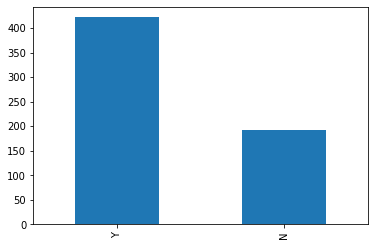

In [12]:
train['Loan_Status'].value_counts().plot.bar()

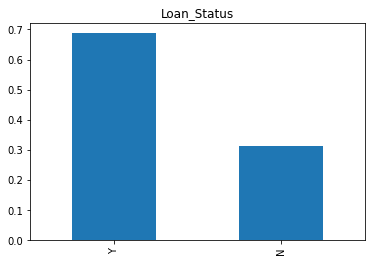

In [13]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(title = "Loan_Status")

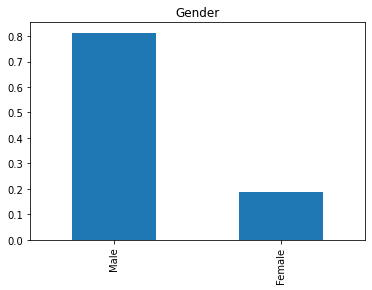

In [14]:
# categorical variable analysis for gender, married, self-employed & credit history
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 


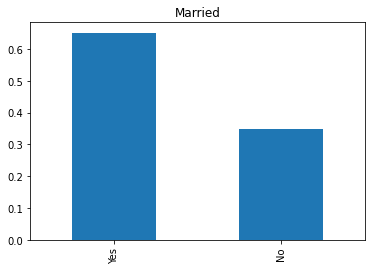

In [15]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 


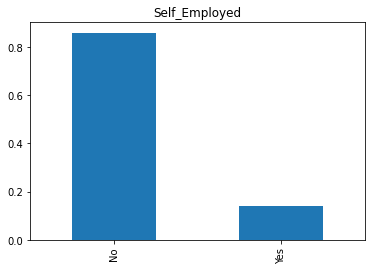

In [16]:
 train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 


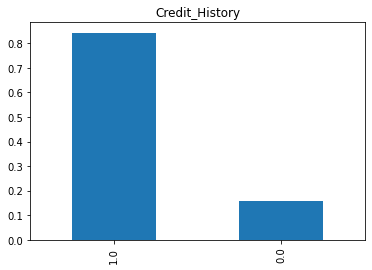

In [17]:
 train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 


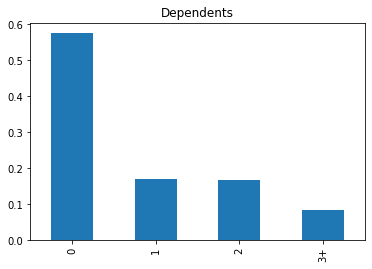

In [18]:
#Ordinal variable analysis for dependents, education, property_area
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(6, 4), title= 'Dependents') 


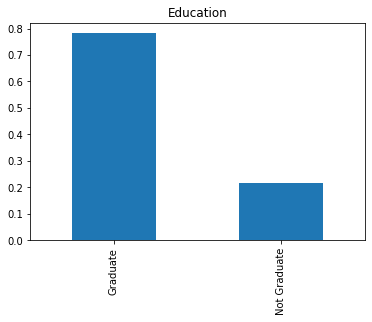

In [19]:
 train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 


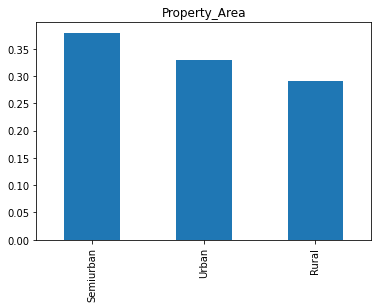

In [20]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

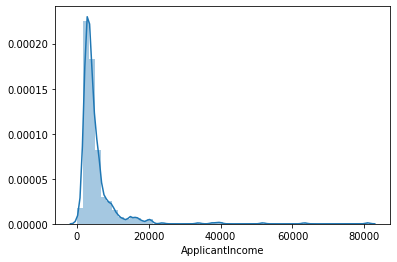

In [21]:
#Numercial variable analysis

sns.distplot(train['ApplicantIncome']); 

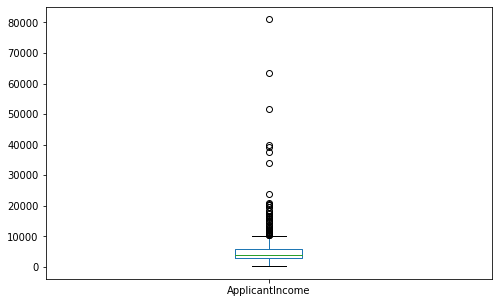

In [22]:
train['ApplicantIncome'].plot.box(figsize=(8,5)) 

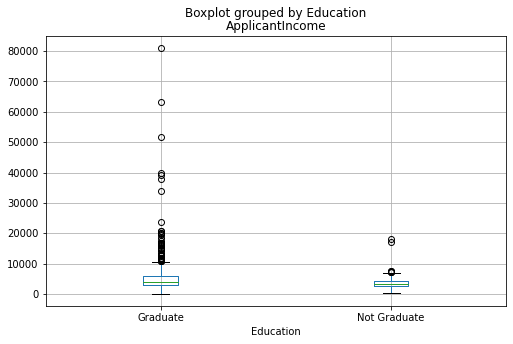

In [23]:
#Applicant-income box plot grouped by education
train.boxplot(figsize=(8,5), column='ApplicantIncome', by = 'Education') 

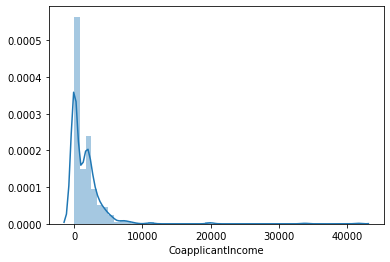

In [24]:
#Coapplicant income

sns.distplot(train['CoapplicantIncome'])

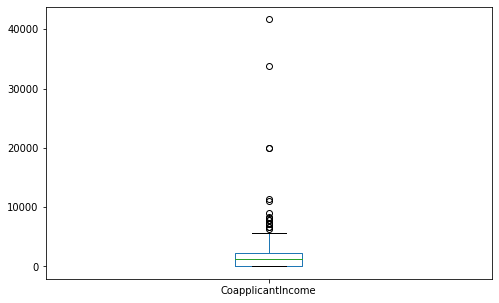

In [25]:
 train['CoapplicantIncome'].plot.box(figsize=(8,5)) 

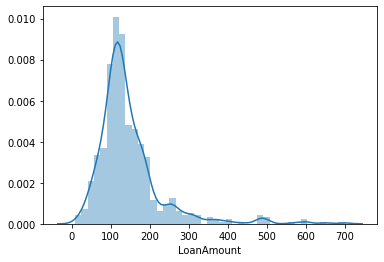

In [26]:
#Loan amount variable

sns.distplot(train['LoanAmount'])


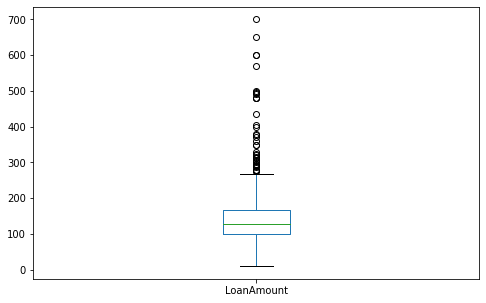

In [27]:
train['LoanAmount'].plot.box(figsize=(8,5)) 

**Bivariate analysis**

In [28]:
#Gender & dependent variable
Gender = pd.crosstab(train['Gender'],train['Loan_Status']) 

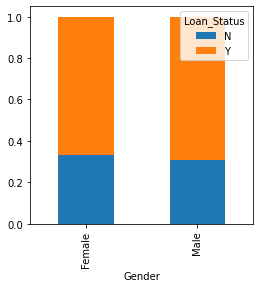

In [29]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [30]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 

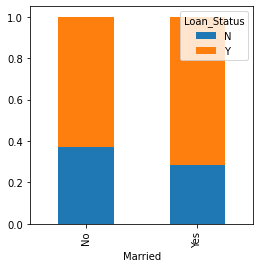

In [31]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

In [32]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 

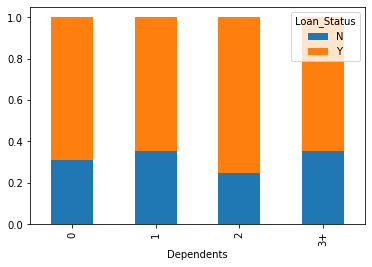

In [33]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

In [34]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) 

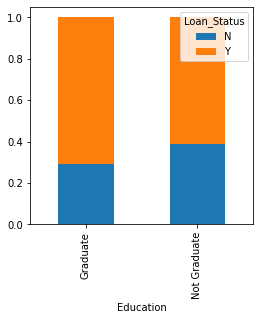

In [35]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

In [36]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 


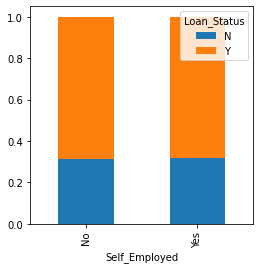

In [37]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

In [38]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 

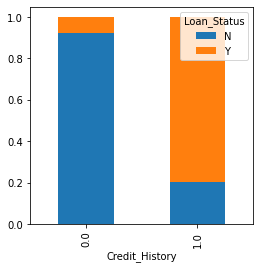

In [39]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))  


In [40]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 


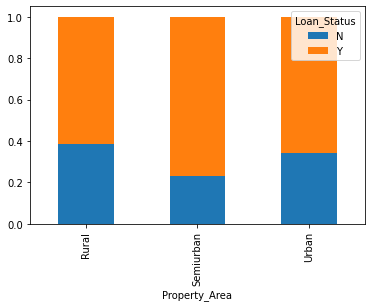

In [41]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

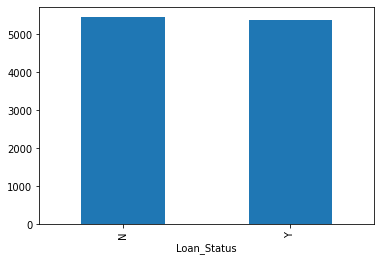

In [42]:
#  the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [43]:
#bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.
bins=[0,2500,4000,6000,81000] 


In [44]:
group=['Low','Average','High', 'Very high'] 

In [45]:
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [46]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 

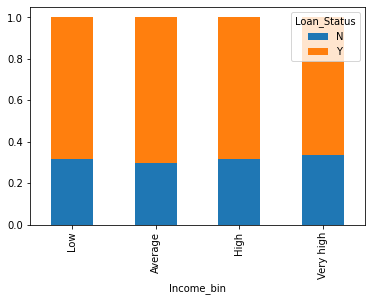

In [47]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

In [48]:
#Coapplicant income and loan amount 

bins=[0,1000,3000,42000] 

In [49]:
group=['Low','Average','High'] 

In [50]:
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)


In [51]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 

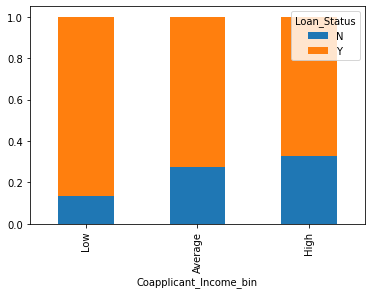

In [52]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

In [53]:
#Applicant Income and Coapplicant Income = Total Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [54]:
bins=[0,2500,4000,6000,81000]

In [55]:
group=['Low','Average','High', 'Very high'] 

In [56]:
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)


In [57]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 

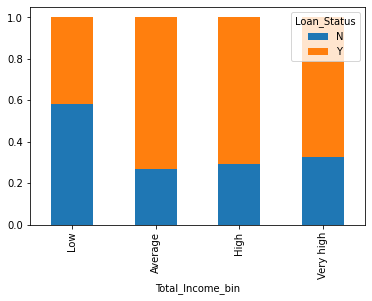

In [58]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [59]:
#Loan_amount

bins=[0,100,200,700] 

In [60]:
group=['Low','Average','High'] 

In [61]:
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)


In [62]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 

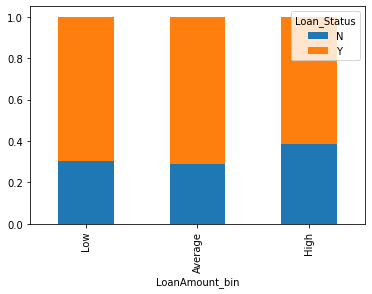

In [63]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [64]:
#drop the bins 
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [65]:
#change the 3+ in dependents variable to 3 to make it a numerical variable.
train['Dependents'].replace('3+', 3,inplace=True) 

In [66]:
test['Dependents'].replace('3+', 3,inplace=True)

In [67]:
#change the target variable’s categories into 0 and 1
train['Loan_Status'].replace('N', 0,inplace=True)

In [68]:
 train['Loan_Status'].replace('Y', 1,inplace=True)

In [69]:
#Correlation between numeric variables

matrix = train.corr() 

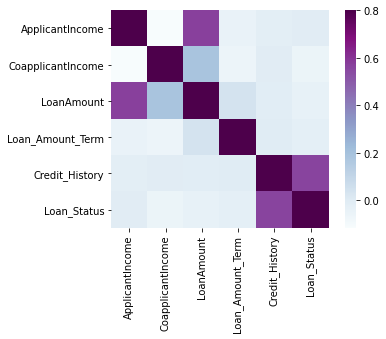

In [70]:
 sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

**Missing Value Analysis**

In [71]:
# Count missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 

In [73]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 

In [74]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [75]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)

In [76]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [77]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [78]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [79]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [80]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
#Missing value in test data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 

In [82]:
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [83]:
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 


In [84]:
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 


In [85]:
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 


In [86]:
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

**Outlier detection**

In [87]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 


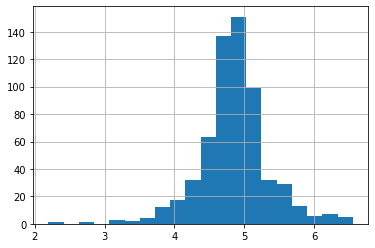

In [88]:
train['LoanAmount_log'].hist(bins=20) 


In [89]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

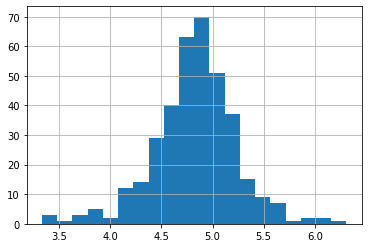

In [90]:
test['LoanAmount_log'].hist(bins=20) 

**Model Building**

In [91]:
# Drop Loan_ID
train=train.drop('Loan_ID',axis=1) 


In [92]:
test=test.drop('Loan_ID',axis=1)

In [93]:
#Put target variable in a separate dataset

X = train.drop('Loan_Status',1) 


In [94]:
y = train.Loan_Status

In [95]:
#Create dummy variables for categorical variables

X=pd.get_dummies(X) 



In [96]:
train=pd.get_dummies(train) 


In [97]:
test=pd.get_dummies(test)

In [98]:
#Divide train dataset

from sklearn.model_selection import train_test_split


In [99]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [100]:
from sklearn.linear_model import LogisticRegression 


In [101]:
from sklearn.metrics import accuracy_score

In [102]:
model = LogisticRegression() 


In [103]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
#predict the Loan_Status for validation set and calculate its accuracy.

In [105]:
pred_cv = model.predict(x_cv)

In [106]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [107]:
#predictions for the test dataset.

pred_test = model.predict(test)

In [108]:
submission=pd.read_csv("../input/sample-submission/sample_submission_49d68Cx (1).csv")

In [109]:
submission['Loan_Status']=pred_test 


In [110]:
submission['Loan_ID']=test['Loan_ID']

KeyError: 'Loan_ID'

In [111]:
#convert 1 and 0 to Y and N

submission['Loan_Status'].replace(0, 'N',inplace=True) 


In [112]:
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [113]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

**Logistic Regression using stratified k-folds cross validation**

In [114]:
from sklearn.model_selection import StratifiedKFold

In [115]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 

     
    


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
pred=model.predict_proba(xvl)[:,1]

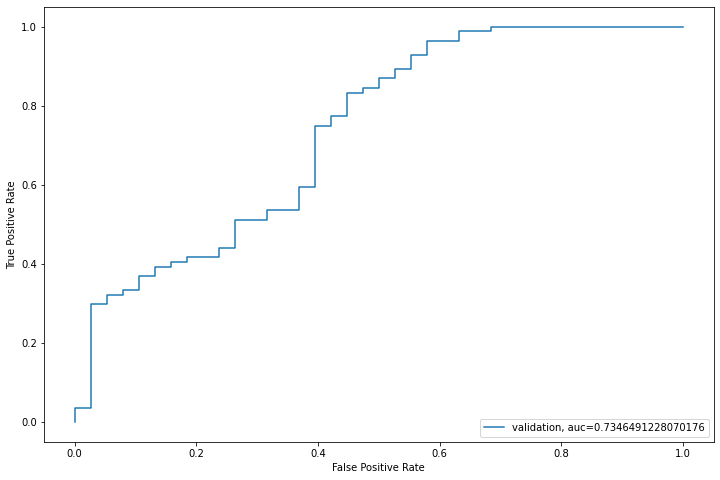

In [117]:
#Visualise ROC curve

from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()



In [118]:
submission['Loan_Status']=pred_test

In [119]:
 submission['Loan_ID']=test['Loan_ID']

KeyError: 'Loan_ID'

In [120]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 

In [121]:
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [122]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

**Feature Engineeering**

In [123]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 

In [124]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

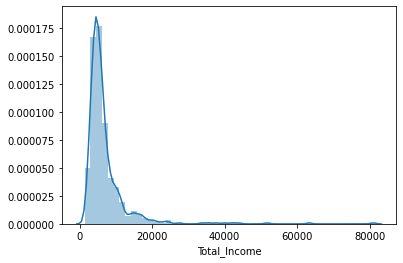

In [125]:
sns.distplot(train['Total_Income'])

In [126]:
# The distribution is right skewed. So take the log transformation to make the distribution normal.

train['Total_Income_log'] = np.log(train['Total_Income']) 

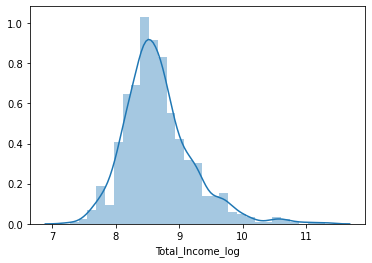

In [127]:
sns.distplot(train['Total_Income_log'])

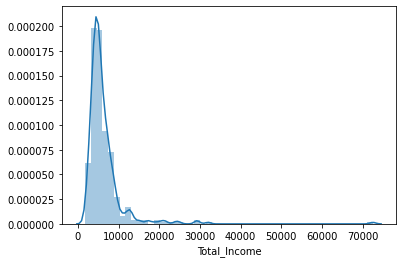

In [128]:
sns.distplot(test['Total_Income'])

In [129]:
test['Total_Income_log'] = np.log(test['Total_Income'])

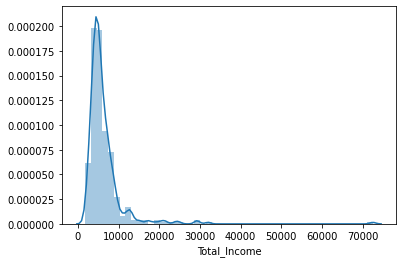

In [130]:
sns.distplot(test['Total_Income'])

**Create EMI feature**

In [131]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 

In [132]:
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

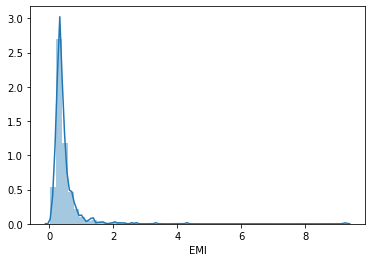

In [133]:
sns.distplot(train['EMI'])

**Create balance income feature**

In [134]:
#Multiply with 1000 to make the units equal
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)

In [135]:
 test['Balance Income']=test['Total_Income']-(test['EMI']*1000)



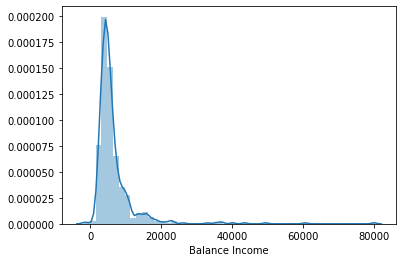

In [136]:
sns.distplot(train['Balance Income'])

In [137]:
#Drop the variables used to create these new features as their correlation will be high with each other.

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 


In [138]:
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [139]:
# Prepare the dataset

X = train.drop('Loan_Status',1) 
    

In [140]:
y = train.Loan_Status  

In [141]:
from sklearn.model_selection import StratifiedKFold

In [142]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]     
model = LogisticRegression(random_state=1)   
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.680327868852459


In [143]:
pred_test = model.predict(test) 


In [144]:
pred=model.predict_proba(xvl)[:,1]

In [145]:
# filling Loan_Status with predictions 
submission['Loan_Status']=pred_test            

In [146]:
# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test['Loan_ID'] 


KeyError: 'Loan_ID'

In [147]:
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 


In [148]:
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [149]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

**Decision Tree**

In [150]:
from sklearn import tree

In [151]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
  print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = tree.DecisionTreeClassifier(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.6721311475409836


In [152]:
 # filling Loan_Status with predictions

submission['Loan_Status']=pred_test            

In [153]:
# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test['Loan_ID'] 


KeyError: 'Loan_ID'

In [154]:
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 


In [155]:
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [156]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

**Random Forest**

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
 print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = RandomForestClassifier(random_state=1, max_depth=10)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7540983606557377


In [159]:
pred_test = model.predict(test)

In [160]:
# Improve the accuracy by tuning the hyperparameters for this model

from sklearn.model_selection import GridSearchCV

In [161]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [162]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [163]:
from sklearn.model_selection import train_test_split 

In [164]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [165]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [166]:
GridSearchCV(cv=None, error_score='raise',  estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',  max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,   min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False),       
 iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=1,
                                

In [167]:
# Estimating the optimized value 
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            max_depth=3, max_features='auto', max_leaf_nodes=None,            min_impurity_decrease=0.0, min_impurity_split=None,            
min_samples_leaf=1, min_samples_split=2,            
min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            
oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [168]:
# From above the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [169]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
   print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)    
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7786885245901639


In [170]:
# filling Loan_Status with predictions
submission['Loan_Status']=pred_test             

In [171]:
# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test['Loan_ID'] 


KeyError: 'Loan_ID'

In [172]:
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 


In [173]:
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [174]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

In [175]:
#Find the feature importance 

importances=pd.Series(model.feature_importances_, index=X.columns)


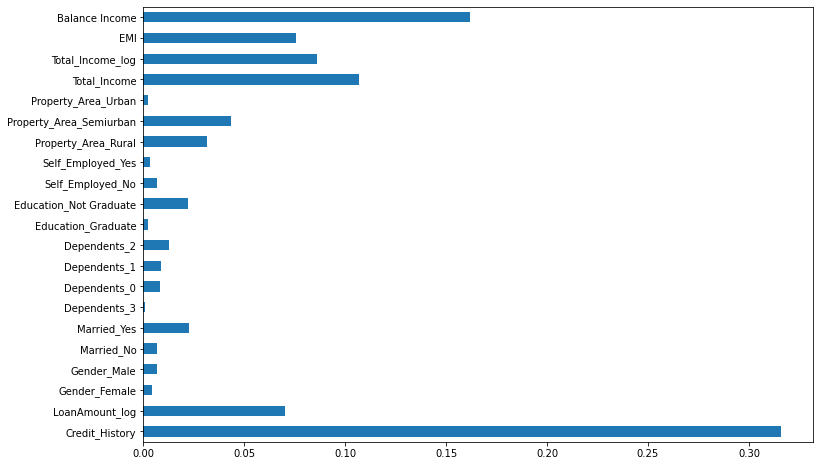

In [176]:
 importances.plot(kind='barh', figsize=(12,8))

In [177]:
#Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

**XG Boost**

In [178]:
from xgboost import XGBClassifier

In [179]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
 print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = XGBClassifier(n_estimators=50, max_depth=4)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7622950819672131


In [180]:
submission['Loan_Status']=pred_test 


In [181]:
submission['Loan_ID']=test['Loan_ID']


KeyError: 'Loan_ID'

In [182]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 


In [183]:
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [184]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')